In [1]:
import math

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import cauchy, norm

### 1.1.1 - Integrate 

In questo esercizio usiamo i metodi Monte Carlo per stimare la media e la varianza della distribuzione uniforme. 

$\langle g \rangle = \int g(r) \, p(r) \, dr $ $ \simeq G_N = \frac{1}{N} \sum_{i=1}^N g(r_i)$, con $r_i$ da $p(r)$.

$\langle r \rangle = \int_0^1 r \, U(r)\, dr  $  $ \simeq G_N = \frac{1}{N} \sum_{i=1}^N g(r_i)$, con $r_i$ da $p(r)=U[0,1)$.

Una singola stima fatta in questo modo non sarà corretta. Ma qui ci salva il teorema del limite centrale: la media di misure ripetute convergerà asintoticamente al valore corretto, con errore che va come $N^{-1/2}$.

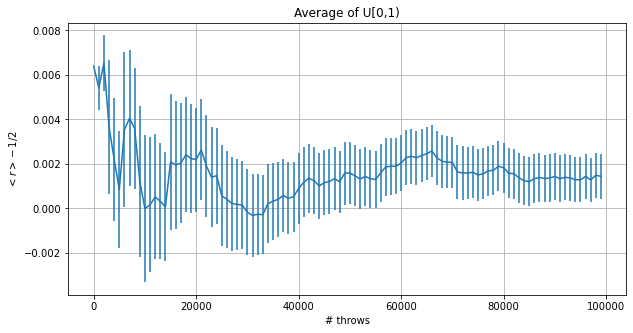

In [2]:
M = 100000  # Throws
N = 100  # Blocks (~ Experiments)
L = int(M / N)  # Rolls per block

datafile = "./data/first_integral.dat"

avg, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

# Plot (experimental value - expected value) with error bars

x = np.arange(N)
x *= L  # coordinates of each error bar
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg - 0.5, yerr=err)
plt.xlabel("# throws")
plt.ylabel(r"$<r>-1/2$")
plt.title("Average of U[0,1)")
# plt.savefig("./figs/1.1.1.png")
plt.show()

### 1.1.2 - Integrate $\sigma^2 = \int_0^1 (r-1/2)^2 dr$

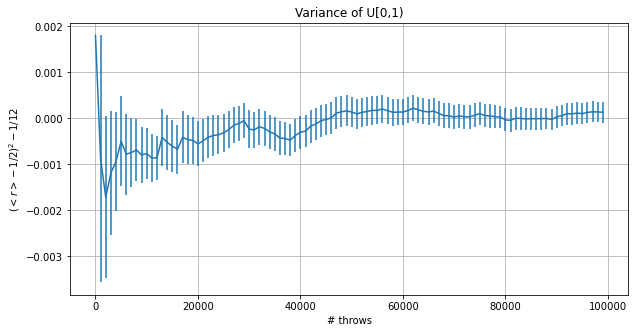

In [3]:
M = 100000  # Throws
N = 100  # Blocks
L = int(M / N)  # Rolls per block

datafile = "./data/second_integral.dat"
avg, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

# Plot (experimental value - expected value)

x = np.arange(N)
x *= L
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.errorbar(x, avg - 1 / 12, yerr=err)
plt.xlabel("# throws")
plt.ylabel(r"$(<r>-1/2)^2 - 1/12$")
plt.title("Variance of U[0,1)")
# plt.savefig("./figs/1.1.2.png")
plt.show()

### 1.1.3 - Run Chi Squared Test

Il test $\chi^2$ stima l'errore tra osservazioni e teoria. Qui testiamo l'ipotesi che i numeri casuali provengono da una distribuzione uniforme. 

$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$

Ciascun test $\chi^2$ corrisponde a contare i numeri casuali caduti in un centesimo dell'intervallo intero. Se la nostra ipotesi è corretta, e il nostro generatore è uniforme, allora un centesimo dei numeri ricadrà in ciascun intervallo, il $\chi^2$ sarà uno per ciascun intervallo, e il test completo darà il valore $100.$

$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

Sono riportati i valori $\chi^2$ di 100 esperimenti.

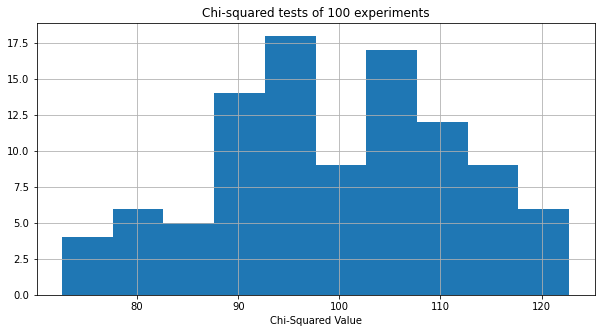

In [4]:
# Chi Squared Test

chi2 = np.loadtxt("./data/chi_squared.dat", usecols=(0), delimiter=" ", unpack="true")

# Plot the results
plt.figure(figsize=(10, 5))
plt.hist(chi2)
# plt.ylabel("Chi-Squared Value - 100")
plt.xlabel("Chi-Squared Value")
plt.title("Chi-squared tests of 100 experiments")
plt.grid(True)
# plt.savefig("./figs/1.1.3.png")
plt.show()

### 1.2 - Test The Central Limit Theorem for Uniform, Exponential, and Cauchy Distributions

Qui si verifica il teorema del limite centrale (e se ne testano i limiti). 

Le somme di numeri casuali indipendentemente distribuiti a varianza finita saranno distribuite come distribuzioni Gaussiane con media uguale alla media delle variabili, e con varianza uguale alla varianza delle variabili diviso $N$. 

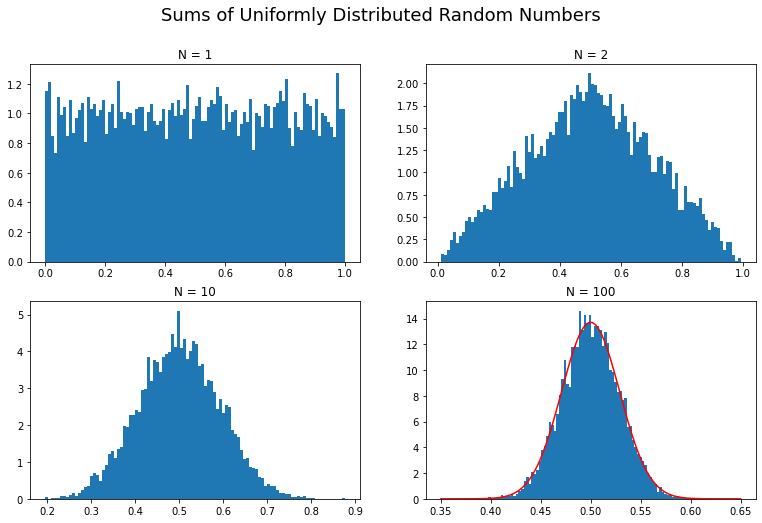

Fit : 0.49987827230000004 0.029099044987579106
Prediction : 0.5 0.028867513459481284


In [5]:
# Uniform Distribution with CLT Test

datafile = "./data/clt_uniform.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(
    datafile, usecols=(0, 1, 2, 3), delimiter=" ", unpack="true"
)

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle("Sums of Uniformly Distributed Random Numbers", fontsize=18)

axes[0, 0].hist(sums1, bins=100, density=True)
axes[0, 0].title.set_text("N = 1")

axes[0, 1].hist(sums2, bins=100, density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sums10, bins=100, density=True)
axes[1, 0].title.set_text("N = 10")

axes[1, 1].hist(sums100, bins=100, density=True)
axes[1, 1].title.set_text("N = 100")

# plt.tight_layout()

data = sums100
mean, std_dev = norm.fit(data)
x = np.linspace(0.35, 0.65, 100)
gauss_fit = norm.pdf(x, loc=mean, scale=std_dev)
axes[1, 1].plot(x, gauss_fit, color="red")
# plt.savefig("./figs/1.2.1.png")
plt.show()
print("Fit :", mean, std_dev)
print("Prediction :", 0.5, (1 / np.sqrt(100 * 12)))

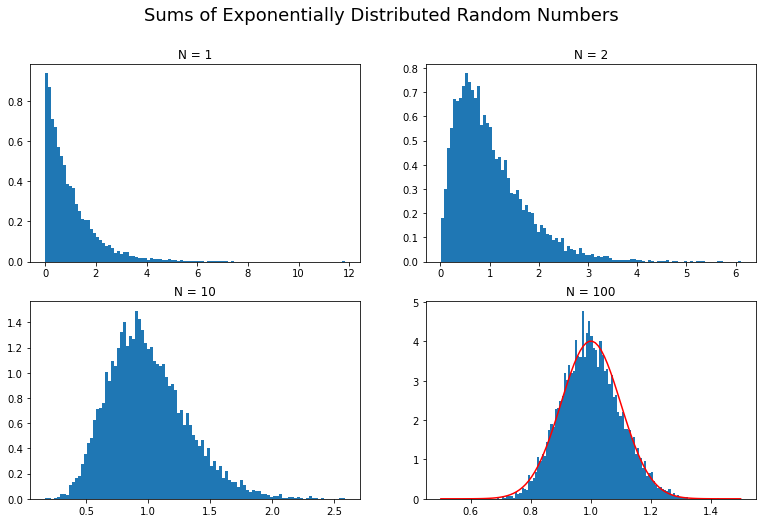

In [6]:
# Exponential Distribution with CLT Test

datafile = "./data/clt_exponential.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(
    datafile, usecols=(0, 1, 2, 3), delimiter=" ", unpack="true"
)

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle("Sums of Exponentially Distributed Random Numbers", fontsize=18)

axes[0, 0].hist(sums1, bins=100, density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 1].hist(sums2, bins=100, density=True)
axes[0, 1].title.set_text("N = 2")

axes[1, 0].hist(sums10, bins=100, density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 1].hist(sums100, bins=100, density=True)
axes[1, 1].title.set_text("N = 100")

data = sums100
mean, std_dev = norm.fit(data)
x = np.linspace(0.5, 1.5, 100)
gauss_fit = norm.pdf(x, mean, std_dev)
axes[1, 1].plot(x, gauss_fit, color="red")
# plt.savefig("./figs/1.2.2.png")
plt.show()

La distribuzione di Cauchy ha varianza infinita, quindi non rientra nelle ipotesi del teorema del limite centrale. Comunque vale un teorema anaolog che dice che questa distribuzione è "stabile" sotto convoluzione come la Gaussiana. 

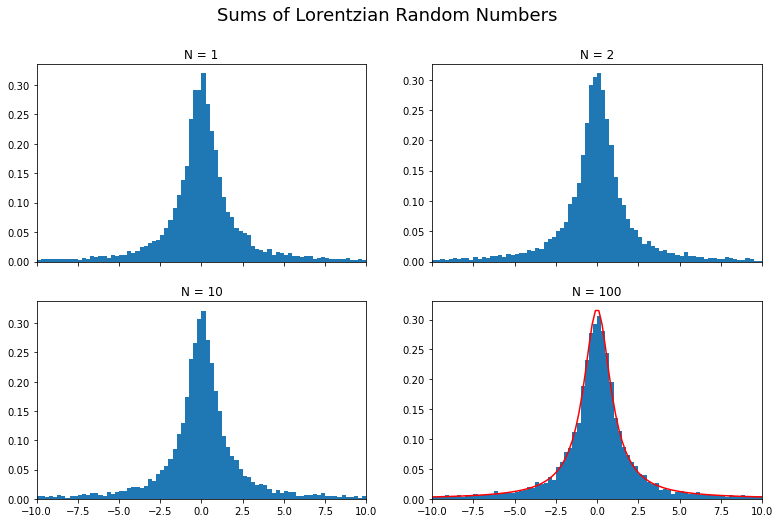

In [7]:
# The Cauchy-Lorentz Distribution, a stable distribution

datafile = "./data/clt_lorentzian.dat"

sums1, sums2, sums10, sums100 = np.loadtxt(
    datafile, usecols=(0, 1, 2, 3), delimiter=" ", unpack="true"
)

sums1 = np.clip(sums1, -25, 25)
sums2 = np.clip(sums2, -25, 25)
sums10 = np.clip(sums10, -25, 25)
sums100 = np.clip(sums100, -25, 25)

fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharex=True)
fig.suptitle("Sums of Lorentzian Random Numbers", fontsize=18)

axes[0, 0].hist(sums1, bins=200, density=True)
axes[0, 0].title.set_text("N = 1")
axes[0, 0].set_xlim([-10, 10])

axes[0, 1].hist(sums2, bins=200, density=True)
axes[0, 1].title.set_text("N = 2")
axes[0, 1].set_xlim([-10, 10])

axes[1, 0].hist(sums10, bins=200, density=True)
axes[1, 0].title.set_text("N = 10")
axes[1, 0].set_xlim([-10, 10])

axes[1, 1].hist(sums100, bins=200, density=True)
axes[1, 1].title.set_text("N = 100")
axes[1, 1].set_xlim([-10, 10])

# Is this a true fit? I'm not using any parameters...

x = np.linspace(-10, 10, 100)
cauchy_fit = cauchy.pdf(x)
axes[1, 1].plot(x, cauchy_fit, color="red")
# plt.savefig("./figs/1.2.3.png")
plt.show()

### 1.3 - Simulate the Buffon Experiment 

Ho simulato l'esperimento di Buffon al calcolatore con i seguenti parametri:

Final estimate for pi: 3.14305 +/- 0.00133 ( 0.042305 % )


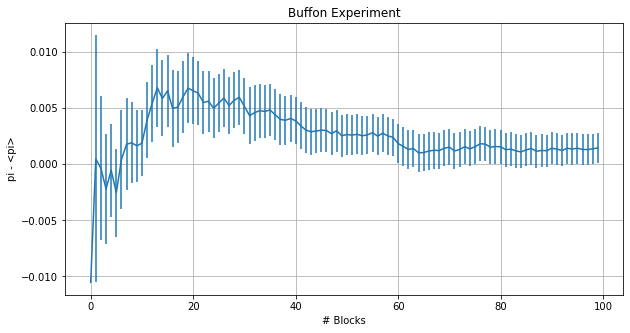

In [8]:
datafile = "./data/buffon.dat"
pi_est, err = np.loadtxt(datafile, usecols=(0, 2), delimiter=" ", unpack="true")

pi_result = pi_est[99]
pi_error = err[99]
pi_perror = round(pi_error / pi_result * 100, 6)
pi_error = round(err[99], 6)
print("Final estimate for pi:", pi_result, "+/-", pi_error, "(", pi_perror, "% )")

x = np.arange(100)
plt.figure(figsize=(10, 5))
plt.errorbar(x, pi_est - np.pi, yerr=err)
plt.xlabel("# Blocks")
plt.ylabel("pi - <pi>")
plt.title("Buffon Experiment")
plt.grid(True)
# plt.savefig("./figs/1.3.png")
plt.show()